# The Promise to Partner


In this JupyterNotebook we show you how to visualize and analyze a network. We do this using the example of the consortia that are participating in or have applied to the National Research Data Infrastructure Initiative (NFDI).

As a data basis, we take the *Letters of Intent* of the respective consortia, in which cooperation partners are named. These mentions are the starting point of our network[^1].


We do the visualization in a JupyterNotebook or R Notebook[^2], so no local installation of R is necessary. 
JupyterNotebooks are built in such a way that you have different cells in which you write code (in our case `R` code).
To run the cell with the code, we can click on "*Cell*" and "*Run Cells*" in the menu.
Or click with the cursor in the cell and then press *SHIFT*" and "*ENTER*" at the same time.
You will then see the result of the code displayed directly below the cell.

[^1]: See also the repository of Dorothea Strecker (https://github.com/dorothearrr/NFDI_Netzwerk), where she has already done a similar visualization and analysis.

[^2]: https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/master?urlpath=lab/tree/demo cf. https://bookdown.org/yihui/rmarkdown/notebook.html

Before we get started, let's clarify a few terms.
A network consists of two components:

* Nodes (circle)
* Edges (line)

Nodes (*nodes* or *vertices*) are represented as circles and represent consortia. Edges (*edges*) are represented as more or less curved lines and emanate from the nodes. They indicate a connection between two nodes. 


<!--![Components of a network. Created by ÉD.](https://i.ibb.co/Lz8N1YW/Einheitskreis-Gestalt.png)-->
![Components of a network. Created by ÉD.](img/Einheitskreis-Gestalt.png)



R is built in such a way that different libraries can be loaded for different functions.
For the network analysis we will use the package `igraph`[^2b].
With `library(igraph)` we load the package. 

With `if (!require(igraph)) install.packages(igraph)` we install the package in case it is not available on the current system.

[^2b]: https://igraph.org/r/

In [3]:
if (!require(igraph)) install.packages(igraph)
library(igraph)

## The Dataset

The data basis is a two-column listing of the consortia.
The first column (`from`) contains the consortium whose *letter of intent* is evaluated. The second column (`to`) contains the consortium which is named as cooperation partner.

This data is read in by means of the function `read.table`.
There are three parameters:

* `header=TRUE` (there is a header line in the dataset).
* `sep=","` (the values are separated by a comma)
* `text=""` (the values themselves are between the quotes)
  
We pass these values to the self-selected variable `NFDI_edges` , which is done with the arrow symbol pointing to the left.

The data itself comes from the GitHub gist [nfdi-collaborations.csv](https://gist.github.com/LukasCBossert/9bd04115db3aa9ed974fdc69d3ff227c)                    

In [4]:
# Dataset:
# https://gist.github.com/LukasCBossert/9bd04115db3aa9ed974fdc69d3ff227c
NFDI_edges <- read.table(header=TRUE,
                         sep=",",
                         text="
from,to
DataPLANT,NFDI4BioDiversity
DataPLANT,NFDI4Chem
GHGA,NFDI4Health
KonsortSWD,BERD@NFDI
KonsortSWD,NFDI4BioDiversity
KonsortSWD,NFDI4Earth
KonsortSWD,NFDI4Health
KonsortSWD,Text+
NFDI4BioDiversity,NFDI4Earth
NFDI4BioDiversity,NFDI4Chem
NFDI4BioDiversity,NFDI4Health
NFDI4BioDiversity,KonsortSWD
NFDI4BioDiversity,DataPLANT
NFDI4Cat,FAIRmat
NFDI4Cat,NFDI4Chem
NFDI4Cat,NFDI4Ing
NFDI4Cat,DAPHNE4NFDI
NFDI4Chem,FAIRmat
NFDI4Chem,NFDI4Ing
NFDI4Chem,NFDI4Cat
NFDI4Chem,DAPHNE4NFDI
NFDI4Chem,PUNCH
NFDI4Chem,NFDI4Health
NFDI4Chem,NFDI4BioDiversity
NFDI4Culture,Text+
NFDI4Culture,MaRDI
NFDI4Culture,NFDI4Ing
NFDI4Health,GHGA
NFDI4Health,KonsortSWD
NFDI4Health,NFDI4Chem
NFDI4Health,NFDI4Earth
NFDI4Health,NFDI4BioDiversity
NFDI4Ing,NFDI-MatWerk
NFDI4Ing,FAIRmat
NFDI4Ing,NFDI4Chem
NFDI4Ing,NFDI4Earth
NFDI4Ing,MaRDI
NFDI4Ing,Text+
NFDI4Ing,NFDI4Culture
BERD@NFDI,KonsortSWD
BERD@NFDI,MaRDI
BERD@NFDI,Text+
DAPHNE4NFDI,FAIRmat
DAPHNE4NFDI,NFDI-MatWerk
DAPHNE4NFDI,NFDI4Cat
DAPHNE4NFDI,NFDI4Chem
DAPHNE4NFDI,NFDI4Health
DAPHNE4NFDI,NFDI4Ing
DAPHNE4NFDI,PUNCH
FAIRmat,DAPHNE4NFDI
FAIRmat,DataPLANT
FAIRmat,MaRDI
FAIRmat,NFDI-MatWerk
FAIRmat,NFDI4Cat
FAIRmat,NFDI4Chem
FAIRmat,DataScience
FAIRmat,NFDI4Ing
FAIRmat,PUNCH
MaRDI,BERD@NFDI
MaRDI,FAIRmat
MaRDI,NFDI-MatWerk
MaRDI,NFDI4Cat
MaRDI,NFDI4Chem
MaRDI,NFDI4Ing
MaRDI,PUNCH
NFDI-MatWerk,DAPHNE4NFDI
NFDI-MatWerk,DataPLANT
NFDI-MatWerk,FAIRmat
NFDI-MatWerk,MaRDI
NFDI-MatWerk,NFDI4Chem
NFDI-MatWerk,DataScience
NFDI-MatWerk,NFDI4Ing
DataScience,KonsortSWD
DataScience,MaRDI
DataScience,NFDI-MatWerk
DataScience,NFDI4BioDiversity
DataScience,NFDI4Cat
DataScience,NFDI4Chem
DataScience,NFDI4Culture
DataScience,NFDI4Health
DataScience,NFDI4Ing
DataScience,NFDI4Microbiota
NFDI4Earth,DataPLANT
NFDI4Earth,GHGA
NFDI4Earth,KonsortSWD
NFDI4Earth,NFDI4BioDiversity
NFDI4Earth,NFDI4Cat
NFDI4Earth,NFDI4Chem
NFDI4Earth,NFDI4Culture
NFDI4Earth,NFDI4Health
NFDI4Earth,NFDI4Ing
NFDI4Microbiota,DataPLANT
NFDI4Microbiota,GHGA
NFDI4Microbiota,NFDI4BioDiversity
NFDI4Microbiota,NFDI4Chem
NFDI4Microbiota,DataScience
NFDI4Microbiota,NFDI4Health
NFDI4Microbiota,NFDI4Ing
PUNCH,DAPHNE4NFDI
PUNCH,FAIRmat
PUNCH,GHGA
PUNCH,MaRDI
PUNCH,NFDI4Earth
PUNCH,NFDI4Ing
Text+,KonsortSWD
Text+,NFDI4BioDiversity
Text+,NFDI4Culture
Text+,NFDI4Earth
Text+,NFDI4Ing
")


So that we can create a network from this dataset,
we have to prepare it and create a `igraph graph`.[^3]
This is done with the function `graph_from_data_frame`, to which we pass our dataset.

We also specify that our dataset or network is undirected 
(`directed=FALSE`), that means that the direction as specified by `from,to` in the dataset
does not matter.
All we care about now is that two consortia are linked. 

We pass this information to the variable `NFDI_network`.

[^3]: https://igraph.org/r/doc/graph_from_data_frame.html


In [5]:
NFDI_network <- graph_from_data_frame(NFDI_edges,
                                      directed = FALSE
                                     )

## Basic setting

First, we will set a parameter so that our network always looks the same when the data is the same. This parameter is `seed`.
We choose an arbitrary number, which may be large.

After that we come to the actual plot.
For this we call the function `plot` and pass it the variable of our network graph `NFDI_network`.
For a title we can still specify the parameter `main` and also we can specify if we want to have a frame around the network with `frame=TRUE`.

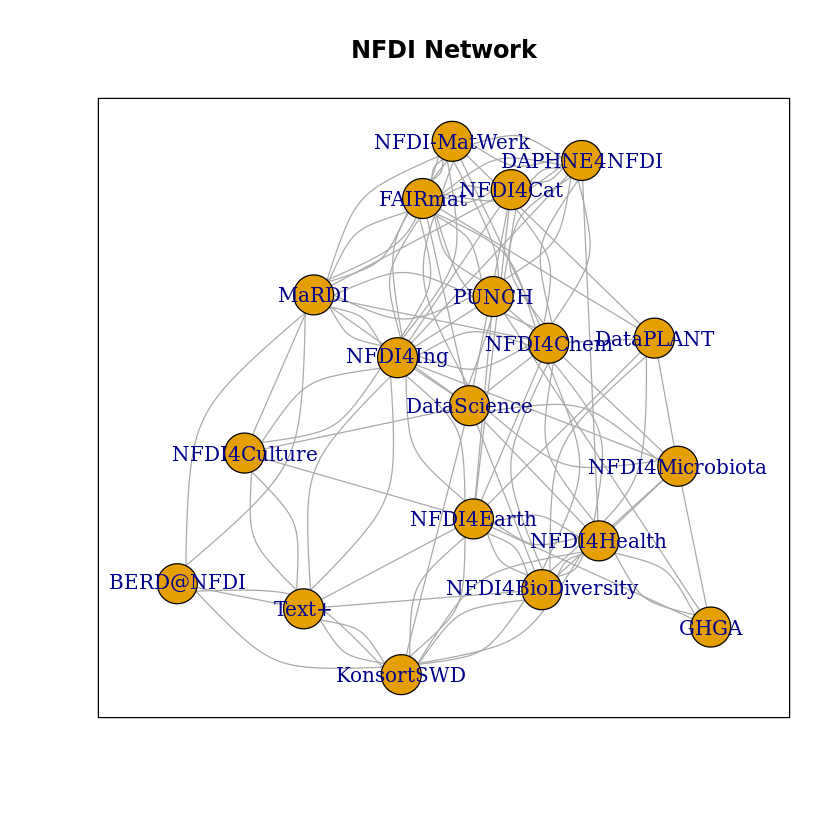

In [6]:
set.seed(9876543)

plot(NFDI_network,                    # loading data frame
     main  = "NFDI Network",          # adding a title
     frame = TRUE                     # making a frame 
     )


We see the network of NFDI consortia without any other explicit settings.

## Layout settings

The next step we want to do is optimize the layout of the network.
Instead of retyping the code for the plot, we will select the content of the last cell, copy and paste it into the next cell.

We'll expand the code this way and work on the network step by step.

There are different algorithms for the layout of networks.
Depending on the data set, sometimes one layout, sometimes the other may be more suitable.
With the layout `graphopt`[^4a] you usually get a good result.

We pass this value `layout.graphopt` to the parameter `layout`.

[^4a]: https://igraph.org/r/doc/layout_with_graphopt.html

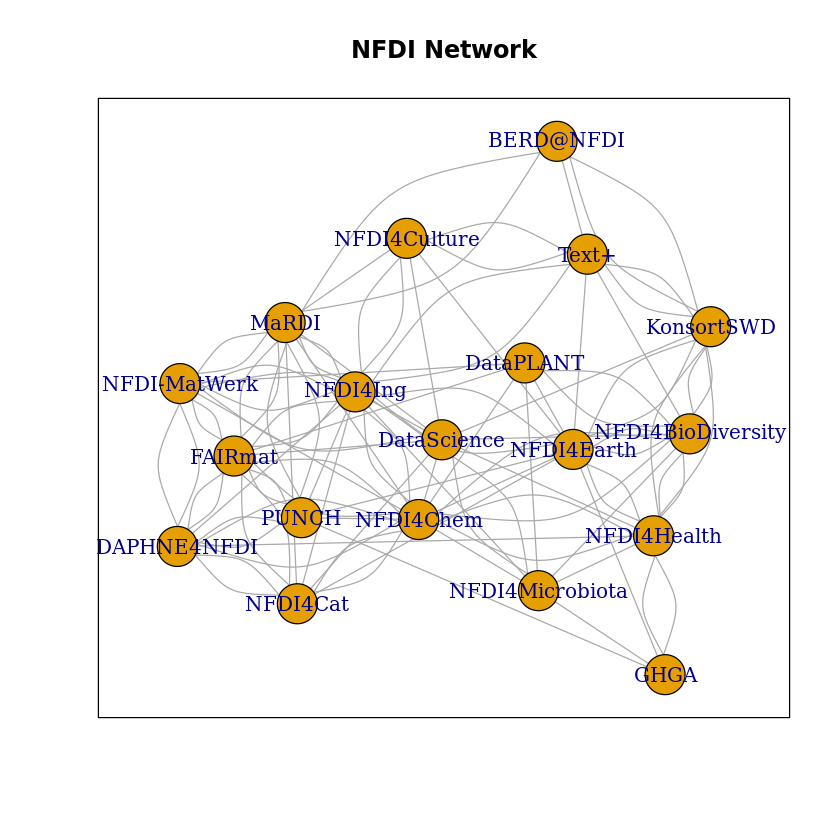

In [7]:
set.seed(9876543)

plot(NFDI_network,                     # loading data frame
     main  = "NFDI Network",           # adding a title
     frame  = TRUE,                    # making a frame
     layout = layout.graphopt,         #* better layout options
     )


We see the network of NFDI consortia without any other explicit settings.

The network is now already better structured and the distances between the nodes are more harmonious.

If you like, you can try out further layout settings [^4b]:

* `layout_circle` (`circle,circular`): Deterministic layout that places the vertices on a circle
* `layout_drl` (`drl`): The Distributed Recursive Layout algorithm for large graphs
* `layout_fruchterman_reingold` (`fr`): Fruchterman-Reingold force-directed algorithm
* `layout_fruchterman_reingold_3d` (`fr3d, fr_3d`): Fruchterman-Reingold force-directed algorithm in three dimensions
* `layout_grid_fruchterman_reingold` (`grid_fr`): Fruchterman-Reingold force-directed algorithm with grid heuristics for large graphs
* `layout_kamada_kawai` (`kk`): Kamada-Kawai force-directed algorithm
* `layout_kamada_kawai_3d` (`kk3d, kk_3d`): Kamada-Kawai force-directed algorithm in three dimensions
* `layout_lgl` (`large, lgl, large_graph`): The Large Graph Layout algorithm for large graphs
* `layout_random` (`random`): Places the vertices completely randomly
* `layout_random_3d` (`random_3d`): Places the vertices completely randomly in 3D
* `layout_reingold_tilford` (`rt, tree`): Reingold-Tilford tree layout, useful for (almost) tree-like graphs
* `layout_reingold_tilford_circular` (`rt_circular, tree`): Reingold-Tilford tree layout with a polar coordinate post-transformation, useful for (almost) tree-like graphs
* `layout_sphere` (`sphere,spherical,circular_3d`): Deterministic layout that places the vertices evenly on the surface of a sphere





[^4b]: https://igraph.org/python/doc/tutorial/tutorial.html#layout-algorithms

### Color, Size, Curvature (Nodes and Edges)

After we have optimized the arrangement of the nodes, let's tackle the representation of the nodes and edges in the next step.

Various parameters can be adjusted according to your own wishes.

First we want to tackle the color of the nodes.
The parameter is `vertex.color` and we can specify an HTML color value (for example `#ffcc66`).[^5]
For the border of the nodes we choose the same color code. The parameter is `vertex.frame.color`.

The labels of the nodes can also be modified. 
The change of the font size is done by the parameter `vertex.label.cex`, to which we pass the value `0.5`.
It is important here that the value is *not* written in quotes. 
This is a relative size and we want the labels to be half the size they were in the previous network.
The color of the label can also be changed.
Quite analogously, the parameter is called `vertex.label.color`, to which we can also pass the color value as a string, such as `"black"`.

A network consists not only of nodes but also of edges connecting two nodes.
For the color change we need the parameter `edge.color`, to which we pass for example `"#808080"`.
Besides the color we can also specify the degree of "curvature", which is set with `edge.curved` and the value `0.1`. Again, it is important that *no* quotes are set.




[^5]: https://www.w3schools.com/colors/colors_picker.asp

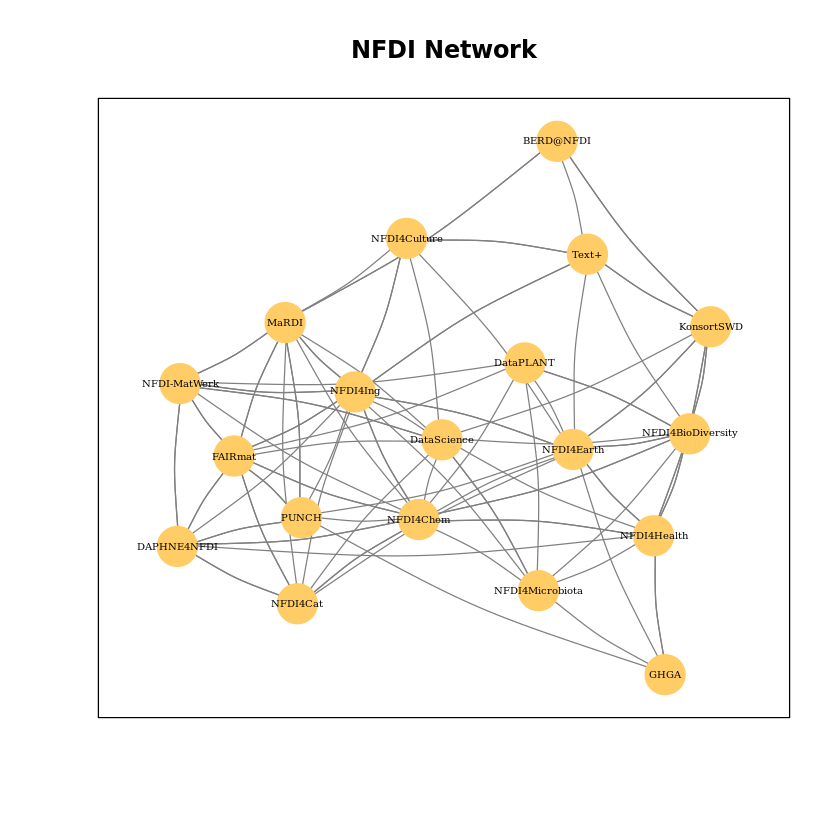

In [8]:
set.seed(9876543)


plot(NFDI_network,                     # loading data frame
     main   = "NFDI Network",          # adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   #* color of nodes
     vertex.frame.color = "#ffcc66",   #* color of the frame of nodes
     vertex.label.cex   = 0.5,         #* size of the description of the labels
     vertex.label.color = "black",     #* color of the description 
     edge.color         = "#808080",   #* color of edges
     edge.curved        = 0.1,         #* factor of "curvity"
     )

## Node size as a function of the number of edges

In the previous network representations, all nodes are the same size.

Now we want to add another layer of information and output the node size according to the number of its edges.

We can determine the number of edges per node with the function `degree`[^6].
If we pass this function the dataset of the network (`degree(NFDI_network)`),
then we get the number of edges per node.
We take these values as the size specification for the nodes.

We thus extend the previous code by one line.
The node size is hidden behind the parameter `vertex.size` and as value we pass the function 
`degree(NFDI_network)`.

[^6]: https://igraph.org/r/doc/degree.html


In [9]:
#data.frame(
    degree(NFDI_network) #* calculate number of edges
#)                  

DataPLANT              GHGA        KonsortSWD NFDI4BioDiversity 
                7                 5                11                13 
         NFDI4Cat         NFDI4Chem      NFDI4Culture       NFDI4Health 
               10                19                 7                13 
         NFDI4Ing         BERD@NFDI       DAPHNE4NFDI           FAIRmat 
               19                 5                12                16 
            MaRDI      NFDI-MatWerk       DataScience        NFDI4Earth 
               14                12                13                15 
  NFDI4Microbiota             PUNCH             Text+ 
                8                10                 9

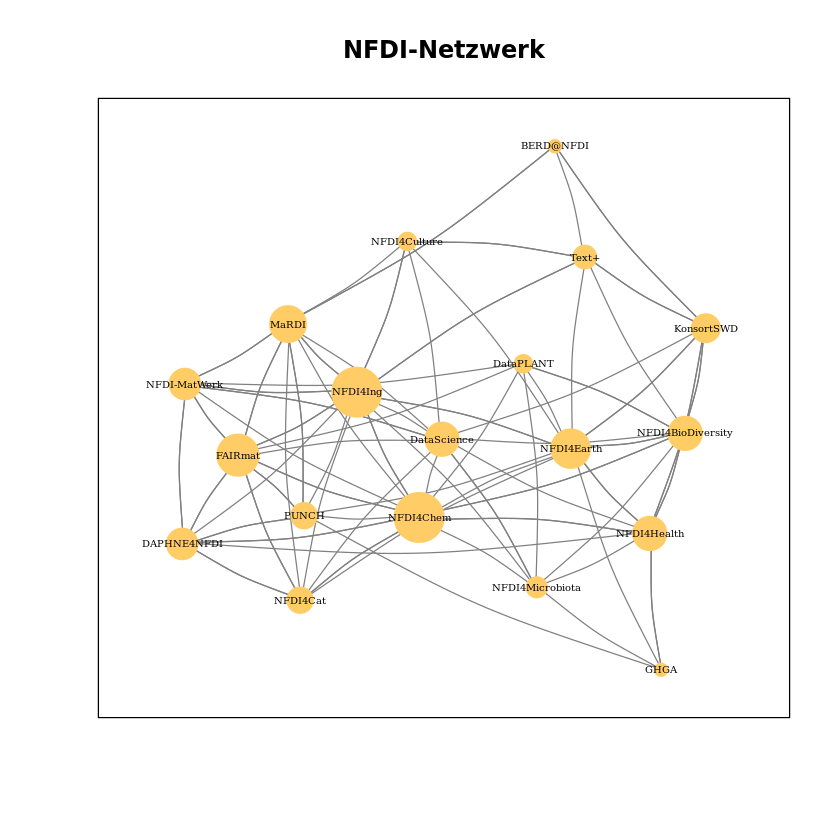

In [10]:
set.seed(9876543)

plot(NFDI_network,                     # loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0.1,         # factor of "curvity"
     vertex.size        = degree(NFDI_network), #* size of nodes depends on amount of edges
     )

## Node size as a function of the number of incoming and outgoing edges.

We have now introduced a second layer of information into our network and can display the node size in relation to the number of edges.

In the next step, we would like to introduce another component. 
Until now, it was irrelevant whether a consortium was named first or second in the dataset, i.e., it was irrelevant whether it was the active or the passive collaborator.

Now we would like to consider the distinction in the network. 
To do this, our graph (network) must be "directed"[^7].

We introduce a new variable (`NFDI_network_directed`), which contains the dataset as a directed graph, 
which we set with `directed = TRUE`.

[^7]: https://en.wikipedia.org/wiki/Directed_graph

In [11]:
NFDI_network_directed <- graph_from_data_frame(NFDI_edges,
                                               directed = TRUE
                                              )

We transfer the remaining plot data from the previous cell.
It is now crucial that we pass the new variable with the directed graph to the plot function.
In addition, we also pass the new variable to the `degree` function.

In the directed network, the curvature of the edges makes it difficult to read.
Therefore we choose the value `0` for `edge.curved`.

Likewise, the arrowheads should become smaller, which is possible with `edge.arrow.size` and the relative value `0.5`.

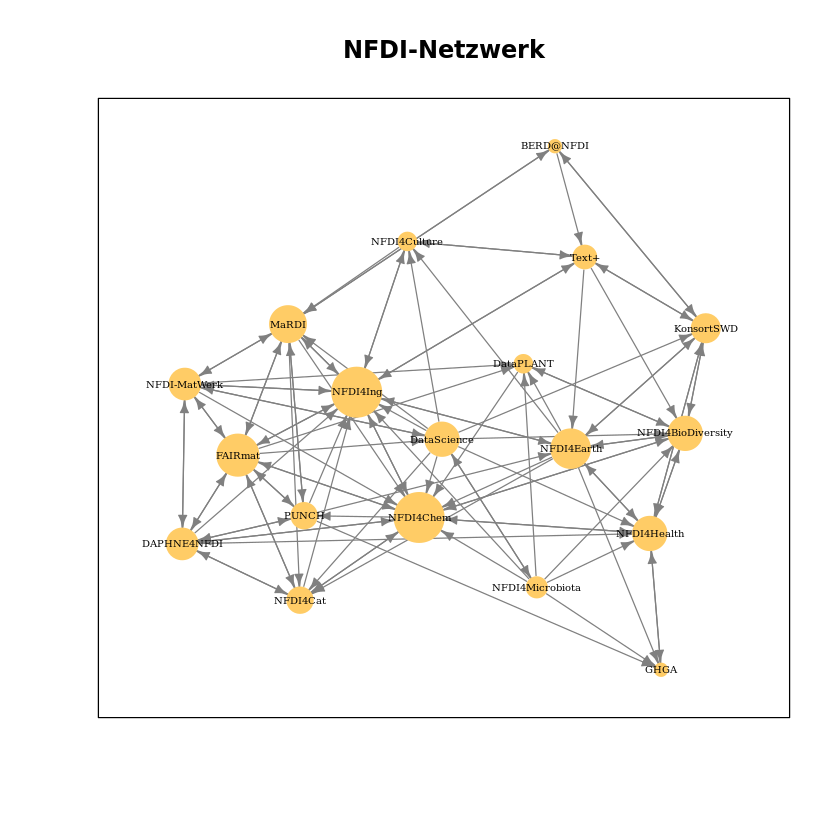

In [12]:
set.seed(9876543)

plot(NFDI_network_directed,            #<<<<<<< loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           #<<<<<<<<< factor of "curvity"
     vertex.size        = degree(NFDI_network_directed), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          #* arrow size,  defaults to 1
    )


In the next step, we want to scale the node size according to the *in*bound edges.
The more often a consortium is named as a collaborator, the larger its node will be.

We can modify the function `degree` for this by adding `mode = "in"`[^8].

```{R}
degree(NFDI_network_directed,
       mode = "in")
```


[^8]: https://igraph.org/r/doc/degree.html


In [13]:
#data.frame(
    degree(NFDI_network_directed,
                  mode = "in")
#)

DataPLANT              GHGA        KonsortSWD NFDI4BioDiversity 
                5                 4                 6                 8 
         NFDI4Cat         NFDI4Chem      NFDI4Culture       NFDI4Health 
                6                12                 4                 8 
         NFDI4Ing         BERD@NFDI       DAPHNE4NFDI           FAIRmat 
               12                 2                 5                 7 
            MaRDI      NFDI-MatWerk       DataScience        NFDI4Earth 
                7                 5                 3                 6 
  NFDI4Microbiota             PUNCH             Text+ 
                1                 4                 4

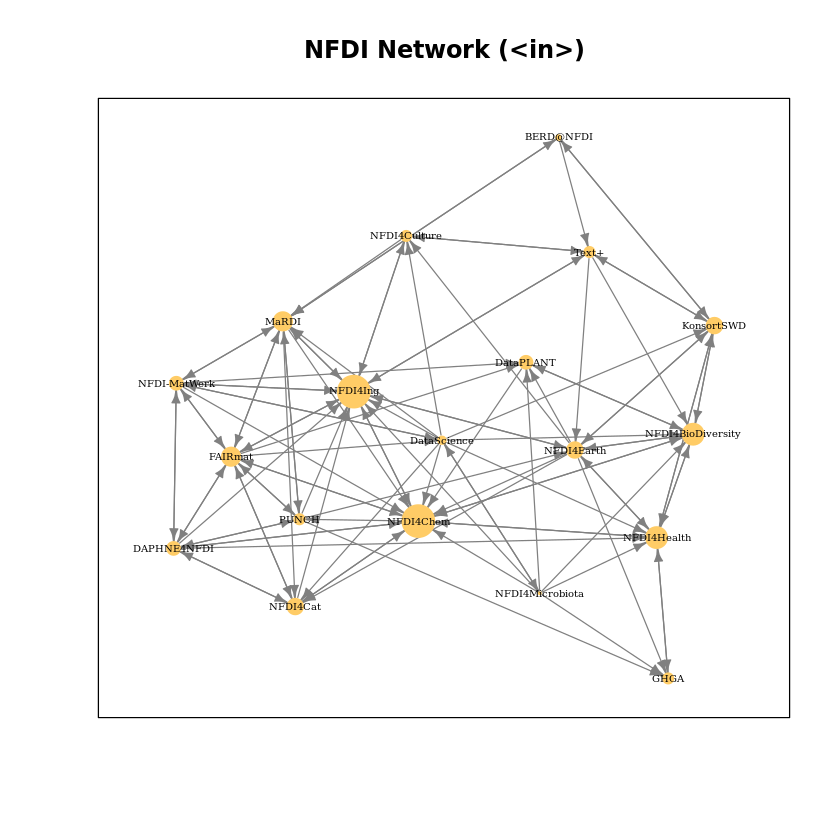

In [14]:
set.seed(9876543)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI Network (<in>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "in"), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

Likewise, we can now also display the size of the consortia according to their *out*going edges.

We take the complete cell content from before and only change `in` to `out`.



In [15]:
#data.frame(
    degree(NFDI_network_directed,
                  mode = "out")
#)

DataPLANT              GHGA        KonsortSWD NFDI4BioDiversity 
                2                 1                 5                 5 
         NFDI4Cat         NFDI4Chem      NFDI4Culture       NFDI4Health 
                4                 7                 3                 5 
         NFDI4Ing         BERD@NFDI       DAPHNE4NFDI           FAIRmat 
                7                 3                 7                 9 
            MaRDI      NFDI-MatWerk       DataScience        NFDI4Earth 
                7                 7                10                 9 
  NFDI4Microbiota             PUNCH             Text+ 
                7                 6                 5

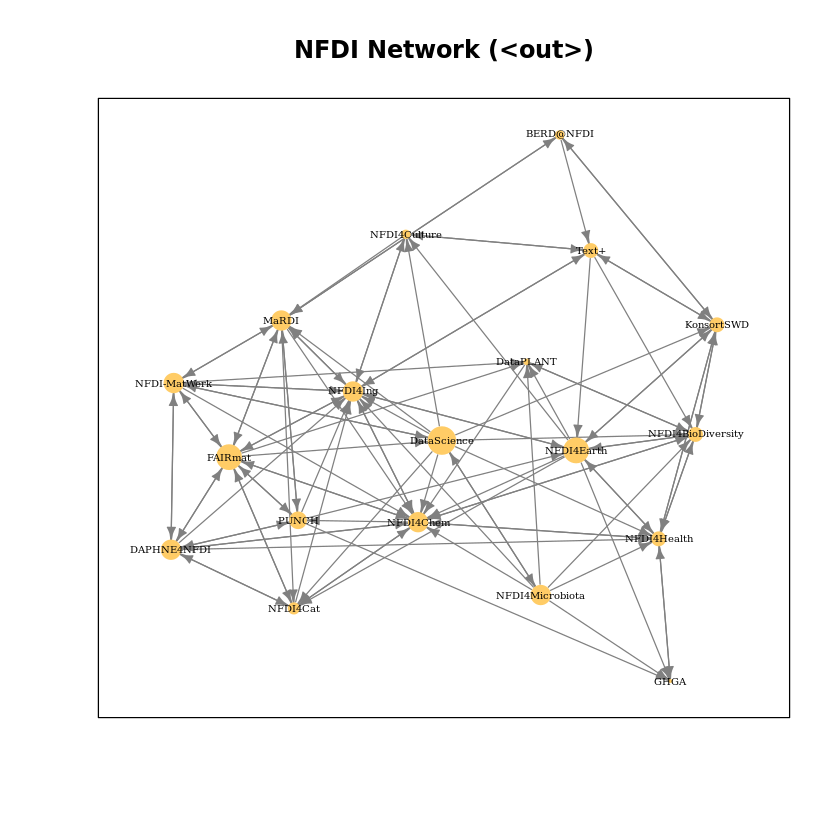

In [16]:
set.seed(9876543)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI Network (<out>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "out"), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

It is noticeable that some nodes are shrinking and in the table you can see that they have the value `0` for outgoing edges. This is because these are the consortia that were already approved in the first funding round and therefore did not submit a new Letter of Intent. After all, our dataset only considers the Letters of Intent from the second funding round. 
The consortia of the first round can therefore only be mentioned as "passive" cooperation partners.

# Network analysis

After the previous rounds of network visualization, let's go one step further and analyze the network structure.

## NFDI conference systematics

As a first step, let's color the nodes or consortia in the colors of the NFDI conference systematics.

How does the NFDI conference systematics come about?
Five panels have been set up for the presentations:

1. Medicine
2. Life Sciences
3. Humanities
4. Engineering Sciences
5. Chemistry/Physics

The applicant consortia were divided among these five groups:[^7b]


<!--![NFDI conference systematics](https://i.ibb.co/vsvf2bg/nfdi-konferenzsystematik.png)-->
![NFDI conference systematics](img/nfdi-konferenzsystematik.png)


In the following, we abbreviate Group 4 "Computer Science, Mathematics and Engineering" as "Engineering".


[^7b]: https://www.dfg.de/download/pdf/foerderung/programme/nfdi/nfdi_konferenz_2020/programm_webkonferenz_2020.pdf


It is noticeable that according to the DFG subject classification system, the natural sciences have been divided between the life sciences, engineering sciences and chemistry/physics, as can be seen in the following Sankey (flow chart).

<!--![Sankey diagram showing the change in subject affiliation between DFG subject classification and NFDI conference classification.](https://i.ibb.co/cyCZ8W6/dfg-nfdi-sankey.png)-->
![Sankey diagram showing the change in subject affiliation between DFG subject classification and NFDI conference classification.](img/dfg-nfdi-sankey.png)


So all consortia have been assigned to one of these five areas and we now want to show this in the network.
We load this classification of the consortia on the conference system in the next cell.

This new record is passed to the variable 'NFDI_nodes'; the first column contains the consortium names, the second column the number from the NFDI-*conference*systematics.
The third column contains the round in which the consortium was approved: `1`= 2019, `2`= 2020.


The data can be read from the public GitHub gist [nfdi-consortia.csv](https://gist.github.com/LukasCBossert/ce56ebd0059b4879c7d11c1090118c25).

In [17]:
# Dataset
# https://gist.github.com/LukasCBossert/ce56ebd0059b4879c7d11c1090118c25
NFDI_nodes <- read.table(header=TRUE,
                         sep=",",
                         text="
name,group,round
DataPLANT,2,1
GHGA,1,1
KonsortSWD,3,1
NFDI4BioDiversity,2,1
NFDI4Cat,5,1
NFDI4Chem,5,1
NFDI4Culture,3,1
NFDI4Health,1,1
NFDI4Ing,4,1
BERD@NFDI,3,2
DAPHNE4NFDI,5,2
FAIRmat,5,2
MaRDI,4,2
NFDI-MatWerk,4,2
DataScience,4,2
NFDI4Earth,2,2
NFDI4Microbiota,2,2
PUNCH,5,2
Text+,3,2
")

Now we still have to create a graph dataset from the dataset, which is again done with `graph_from_data_frame`. What is new is that we now differentiate what is our edge data frame and what is the list with the nodes.



In [18]:
NFDI_network_directed <- graph_from_data_frame(d = NFDI_edges,        # d = data frame =~ edges
                                               vertices = NFDI_nodes, #nodes
                                               directed = TRUE)       #directed

## DFG/NFDI color coding

In order to better recognize the node classification on the NFDI conference systematics in the network, we choose a color coding according to the DFG subject systematics (slight adjustment if necessary).

The following values apply

| No. | Designation          | HTML color code |
|-----|----------------------|-----------------|
| (1) | Medicine             | `#f5ac9f`       |
| (2) | Life Sciences        | `#e43516`       |
| (3) | Humanities           | `#f9b900`       |
| (4) | Engineering Sciences | `#007aaf`       |
| (5) | Chemistry/Physics    | `#6ca11d`       |

We now pass these color values in sequence to the variable 'NFDI_color_code',
thereby the color values are written into a list. 
Using the function `c` the values are written into a vector,[^11]
with which we can continue.


Now we have to establish the link between the color value and the consortia.
For this we introduce the variable `NFDI_color_groups`:
Each value from `NFDI_color_code` has a position number (1-5),
we use this by evaluating the value of the second column of the network graph (`$group`) as a number and thus passing the color value.
Simplified and from the result, the NFDI conference system number gets the color value that is in the corresponding position in the list of the variable `NFDI_color_code`.


[^11]: https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/c

In [19]:
NFDI_color_code <- c("#f5ac9f", # Medicine
                     "#e43516", # Life Sciences
                     "#f9b900", # Humanities
                     "#007aaf", # Engineering Sciences
                     "#6ca11d"  # Chemistry/Physics
                    )
NFDI_color_groups <- NFDI_color_code[
    as.numeric(as.factor(
        V(NFDI_network_directed)$group))]

## Network with colored nodes

We can again take the code from the previous cell and adapt it.

It is crucial that we specify the variable `NFDI_color_groups` as value for `vertex.color` and `vertex.frame.color`.
We also want to consider and display the entire network with all edges (`mode = "total"`).

What is missing now is a legend so that we can also see what is behind the color coding.

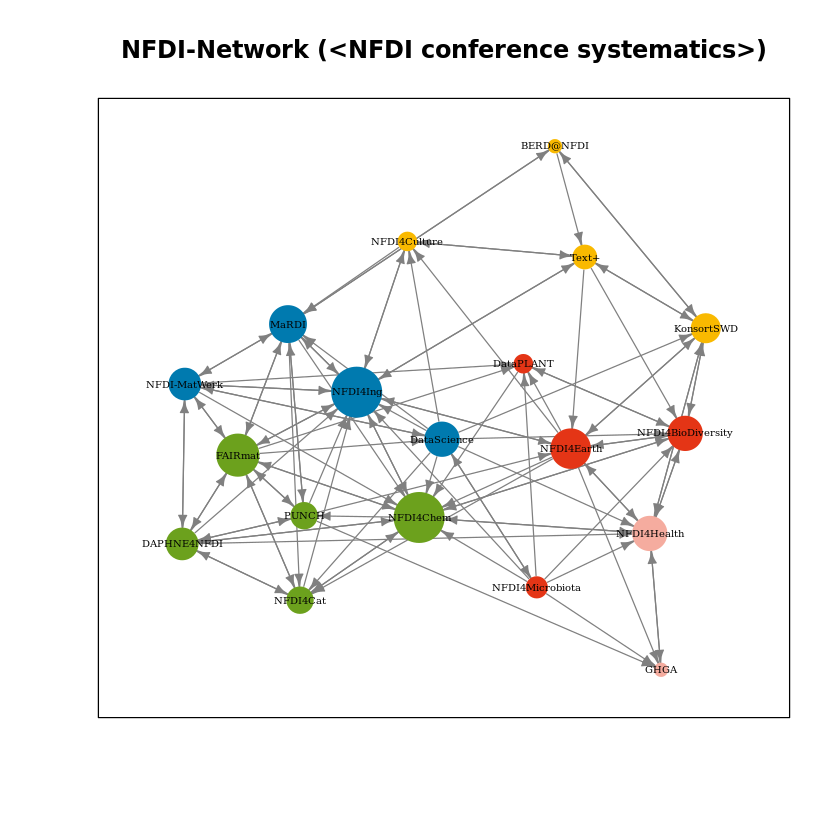

In [21]:
set.seed(9876543)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI-Network (<NFDI conference systematics>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = NFDI_color_groups,   #<<<<<<<<<< color of nodes
     vertex.frame.color = NFDI_color_groups,   #<<<<<<<<<< color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

Ok, we want to add a legend now and since we want to define it only once we make it as a function, which we now fill with values:

* First the positioning of the legend, which we want to have `bottomright`,
then the title (`title = "NFDI conference systematics"`),
now comes the content of the legend, which is controlled by the `legend` parameter:
For this we again build a list (`c()`), in which we enter the desired values.
* `col`: With `col` we set the color scheme and we can directly refer to the NFDI color list via the variable `NFDI_color_code`. 
* `pch`: We must not forget the `pch` parameter, because it is used to define the symbol in the legend. With the value `20` we select a filled circle.
* `bty`: With `bty` and the value `n` for `no` we do without a frame around the legend.
* `cex` (so `character expansion`) is again a relative value and we can specify the font size;
similarly, `pt.cex` works for the legend symbols.

In [22]:
nfdi_plot_legend <- function(){
    
    legend("topleft",   # x-position
       title  = "NFDI conference systematics", # title
       legend = c(
           "(1) Medicine",
           "(2) Life Sciences",
           "(3) Humanities",
           "(4) Engineering Sciences",
           "(5) Chemistry/Physics"
       ),  # the text of the legend
       col    = NFDI_color_code ,  # colors of lines and points beside the legend text
       pch    = 20,     # the plotting symbols appearing in the legend
       bty    = "n",    # no frame, the type of box to be drawn around the legend (n=no frame)
       cex    = .75,    # character expansion factor relative to current par("cex").
       pt.cex = 2       # expansion factor(s) for the points
          )
}

Now we add the legend to the plot.

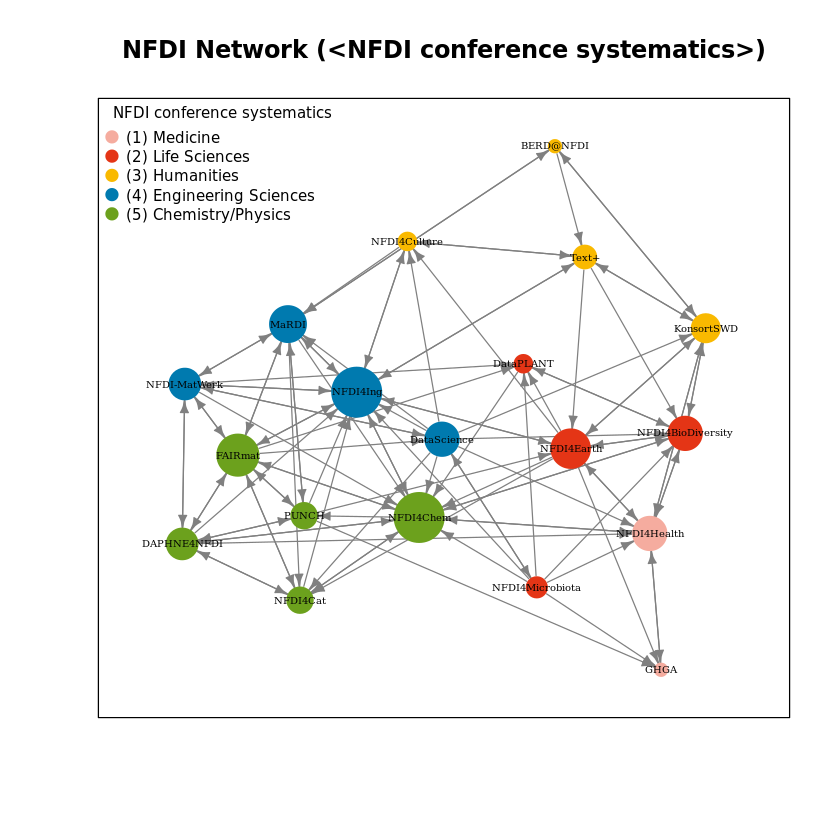

In [23]:
set.seed(9876543)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI Network (<NFDI conference systematics>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = NFDI_color_groups,   # color of nodes
     vertex.frame.color = NFDI_color_groups,   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )
nfdi_plot_legend()

## Additional stuff

Let us concentrate on only one consortium and display the connection from or to this consortium.

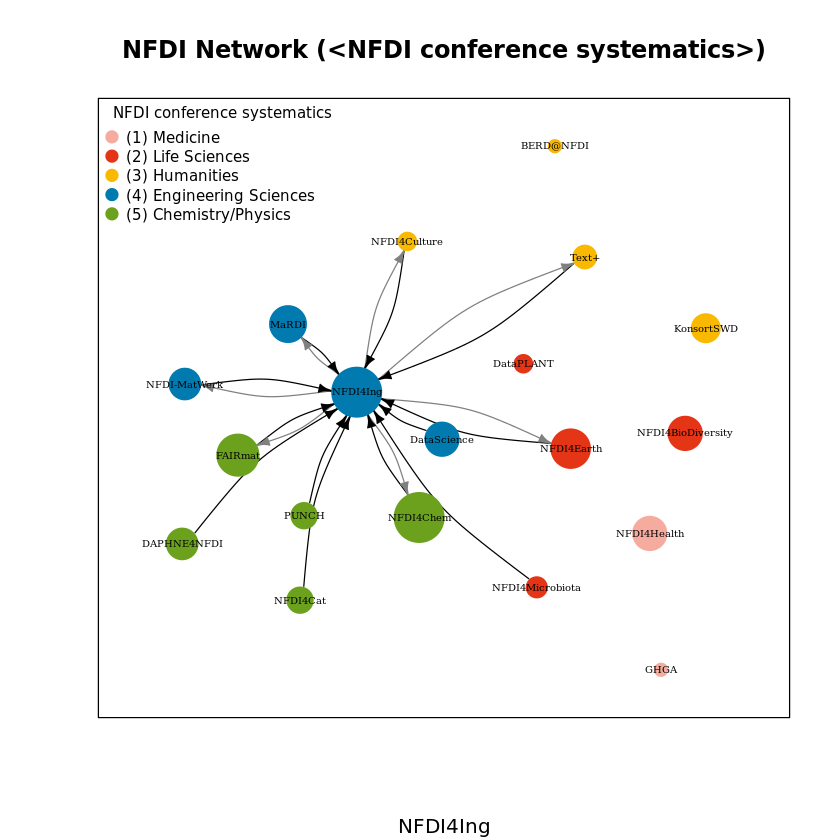

In [30]:
nfdi_plot_group <- function(NFDI_name) {
  
    set.seed(9876543)
    nfdi_local_network <- function(NFDI_name) {
    plot(NFDI_network_directed,
     main   = "NFDI Network (<NFDI conference systematics>)",  # adding a title
    sub = NFDI_name,
     frame  = TRUE,                    # making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = NFDI_color_groups,   # color of nodes
     vertex.frame.color = NFDI_color_groups,   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.curved        = 0.2,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
         edge.color = with(NFDI_edges,
                           ifelse(from %in% NFDI_name,"#808080", # grey
                                  ifelse(to == NFDI_name,"#000000", # black
                                         NA)))
        )
    nfdi_plot_legend()

      
          }
    

# pdf(paste0("img/network_group_",NFDI_name,".pdf"))   # save image as PDF
# nfdi_local_network(NFDI_name) # display image for saving
# dev.off()                      # close image stream
 nfdi_local_network(NFDI_name)  # display image in JupyterNotebook
}
nfdi_plot_group("NFDI4Ing")

Here is another consortium and its connections.

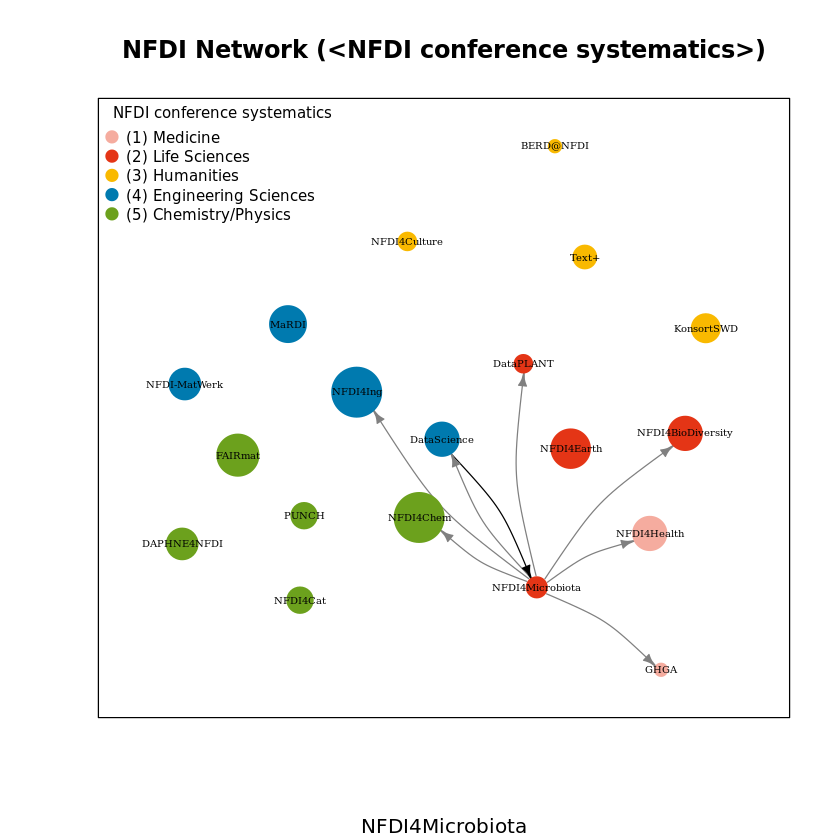

In [31]:
nfdi_plot_group("NFDI4Microbiota")

I love loops....

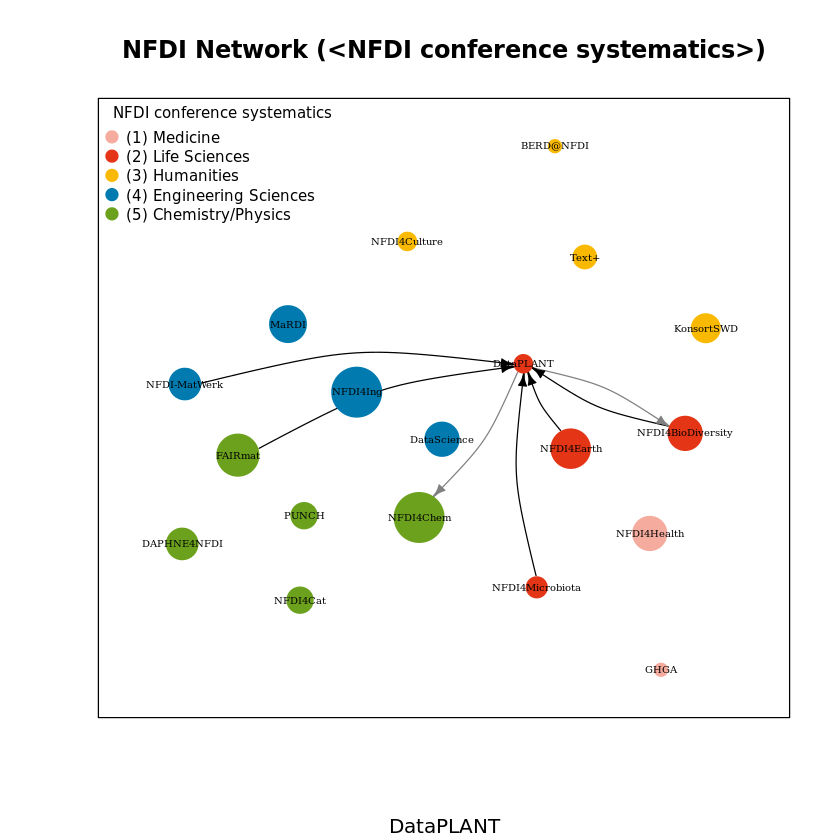

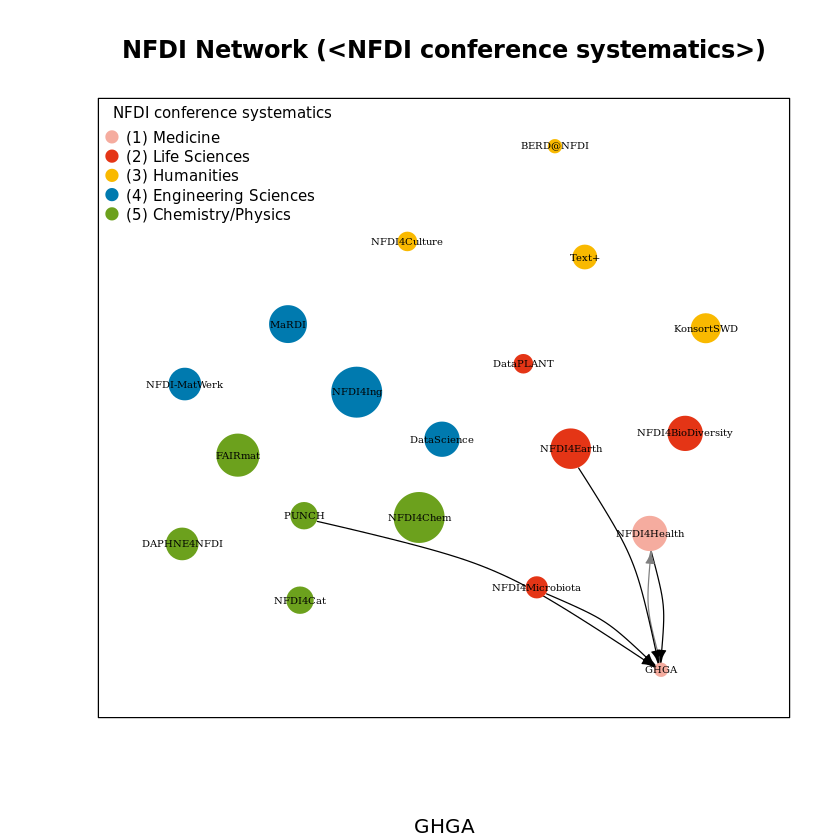

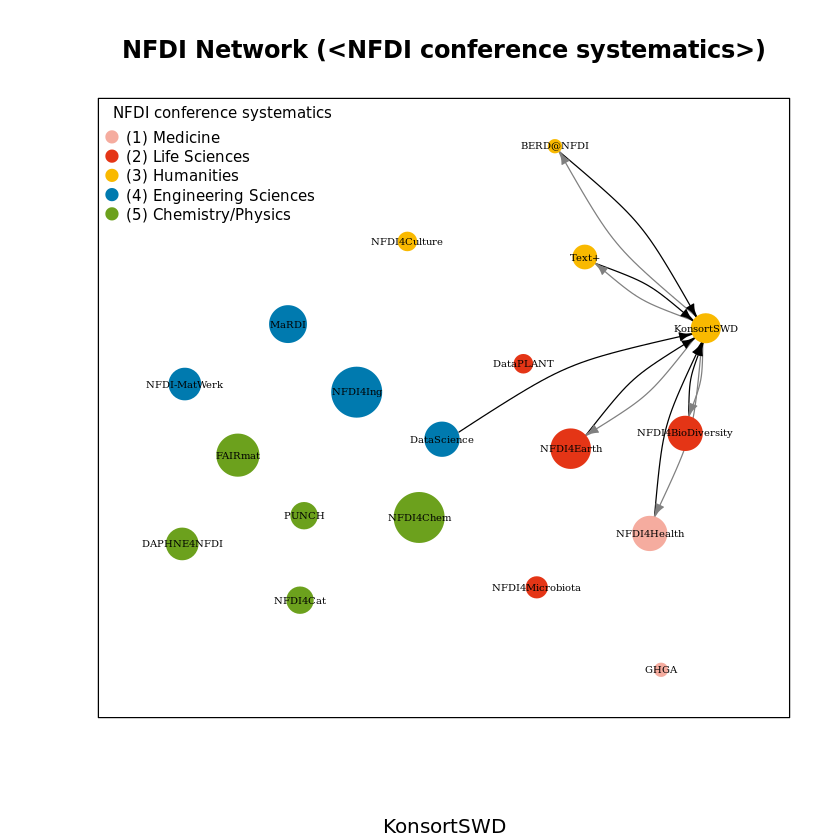

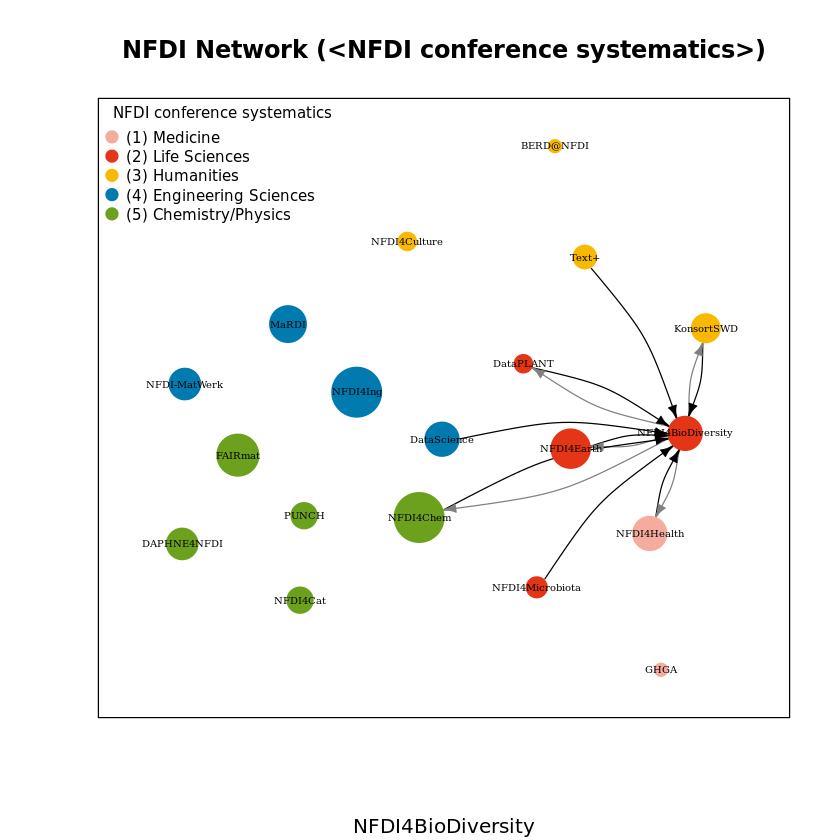

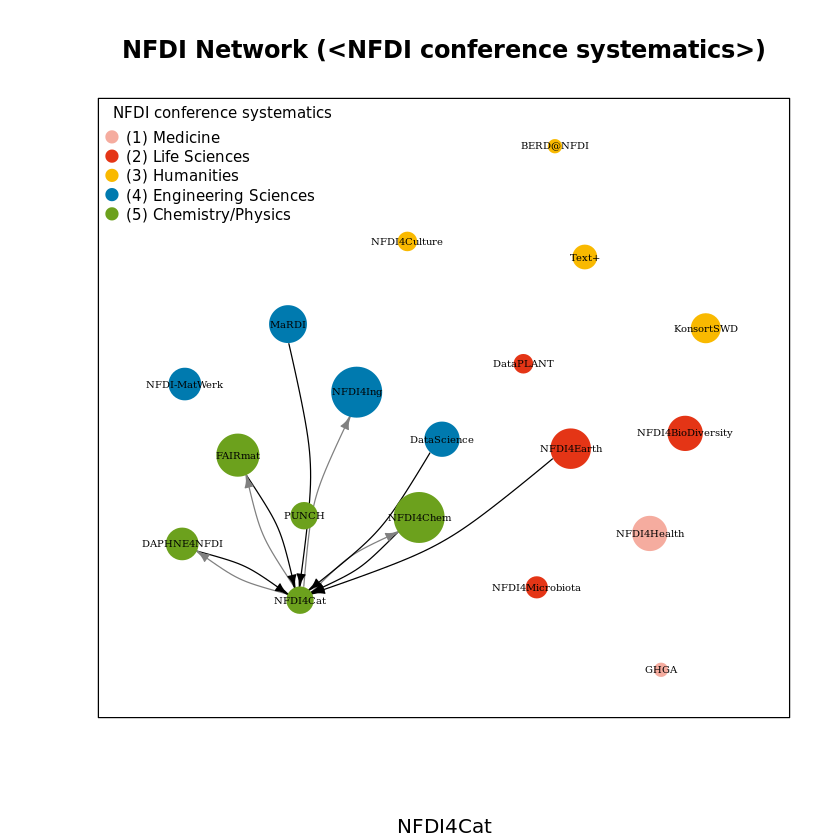

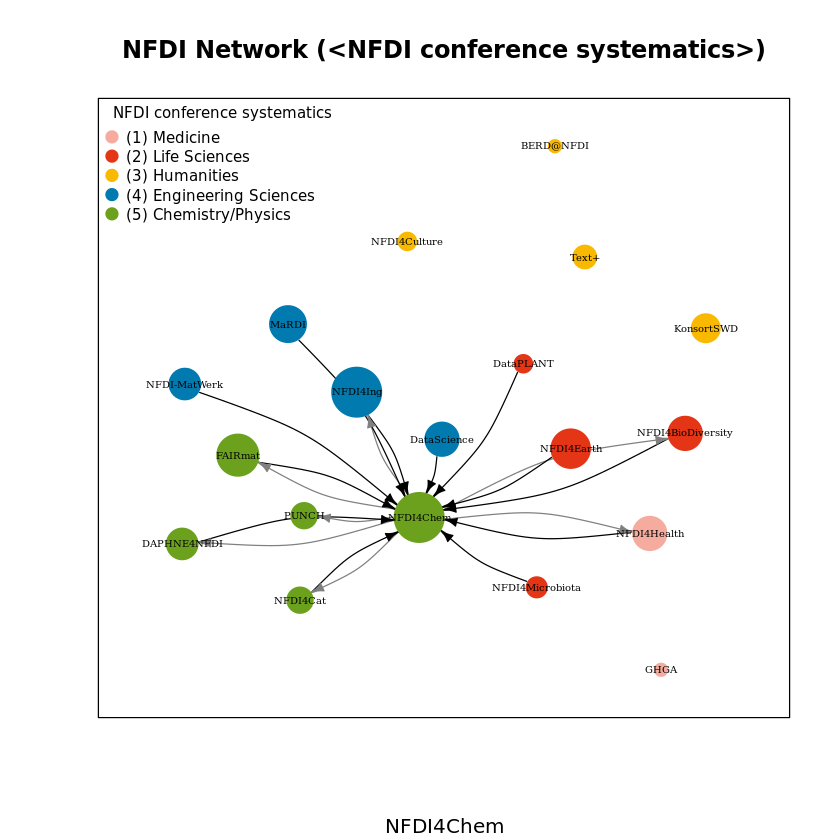

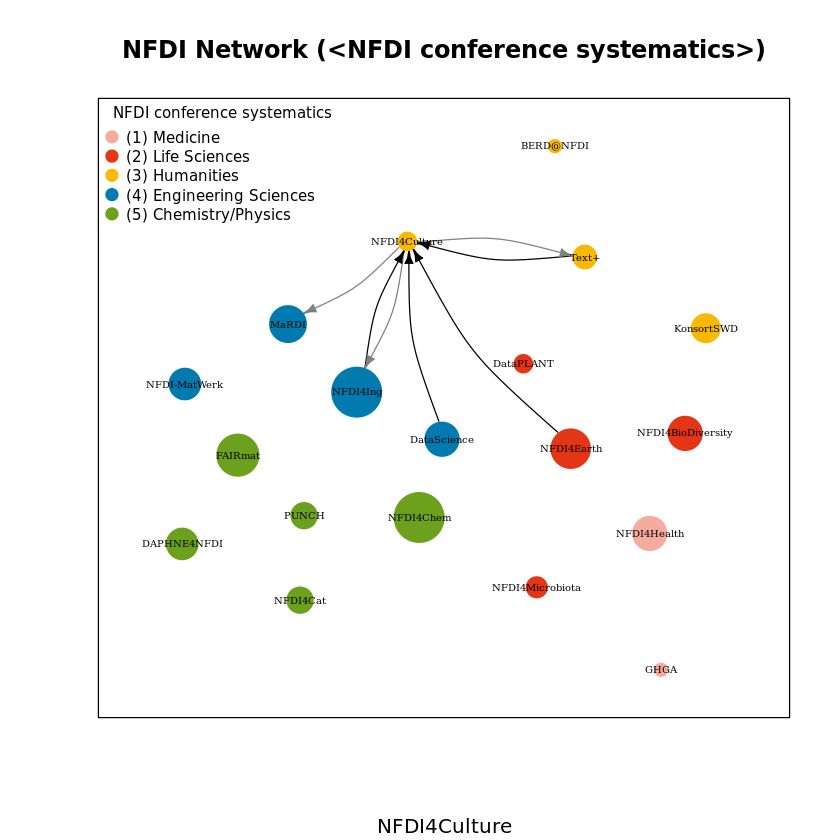

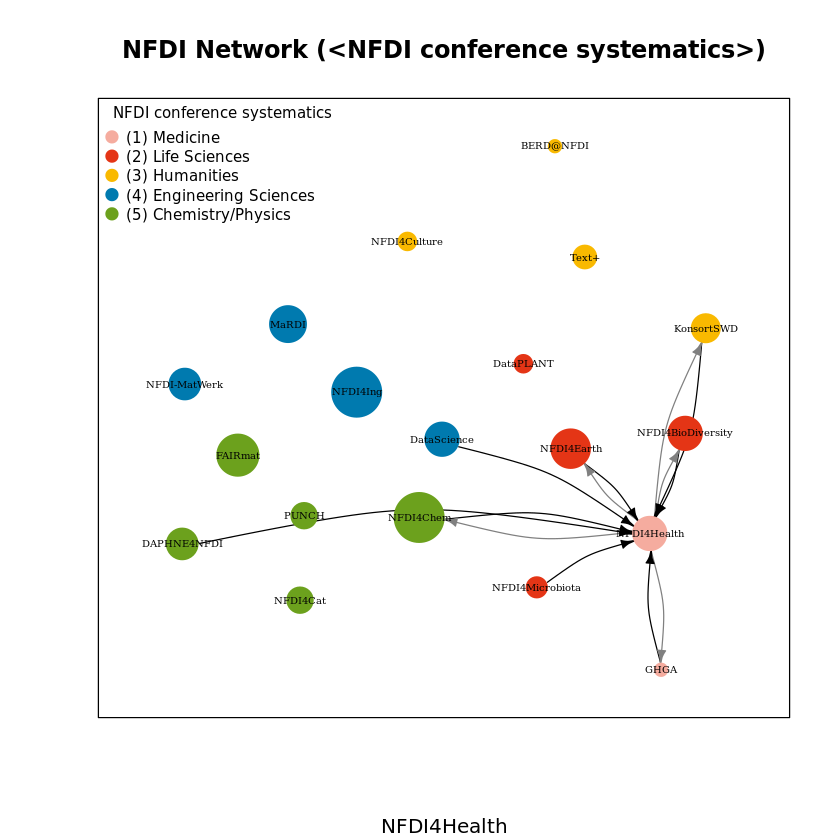

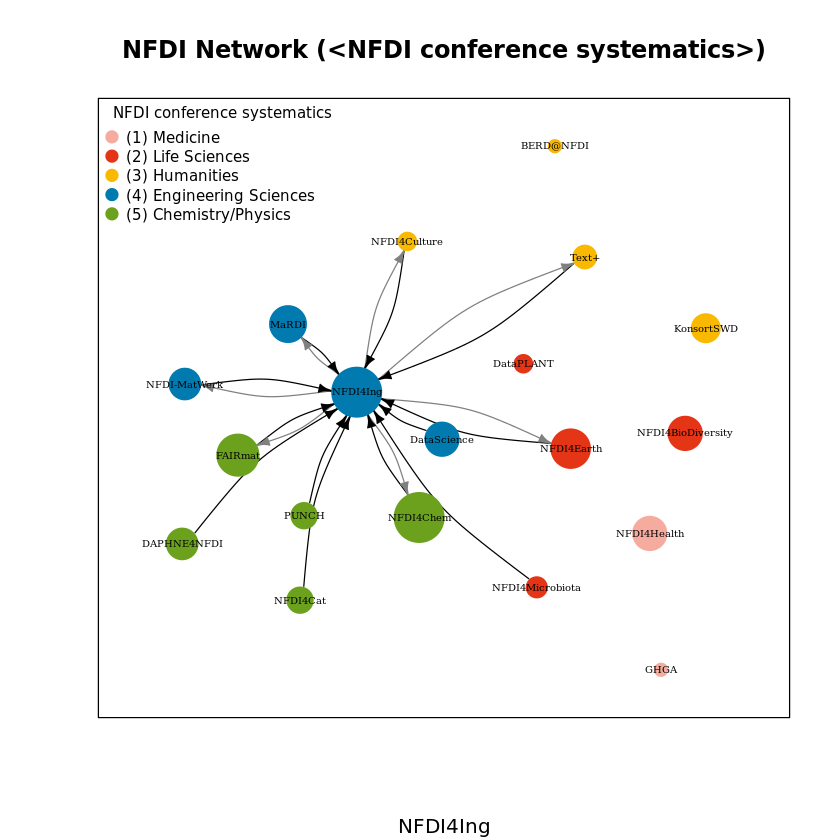

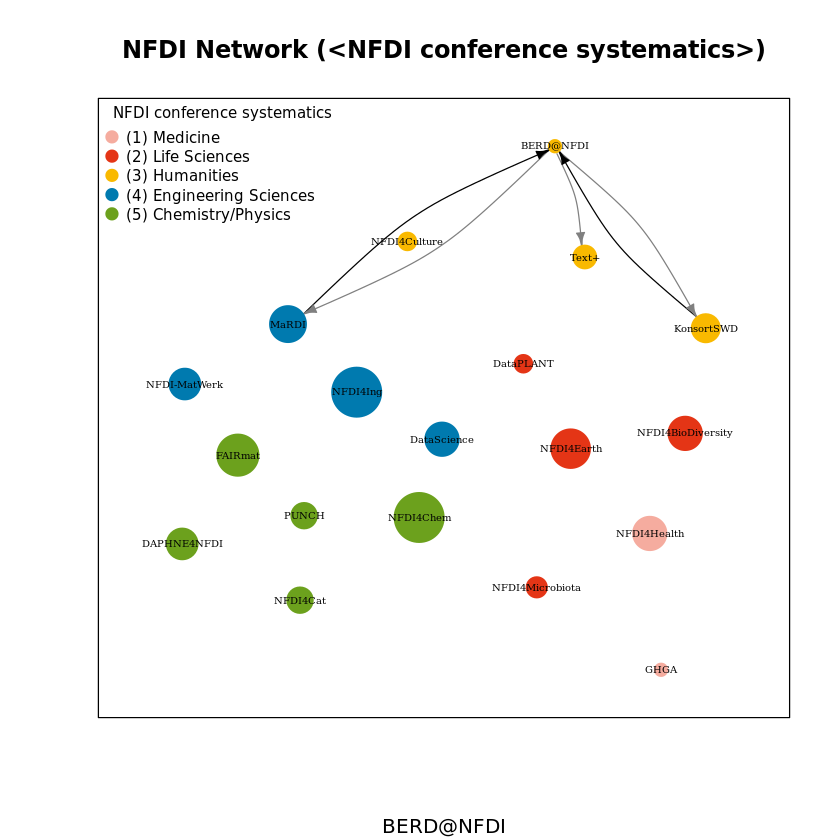

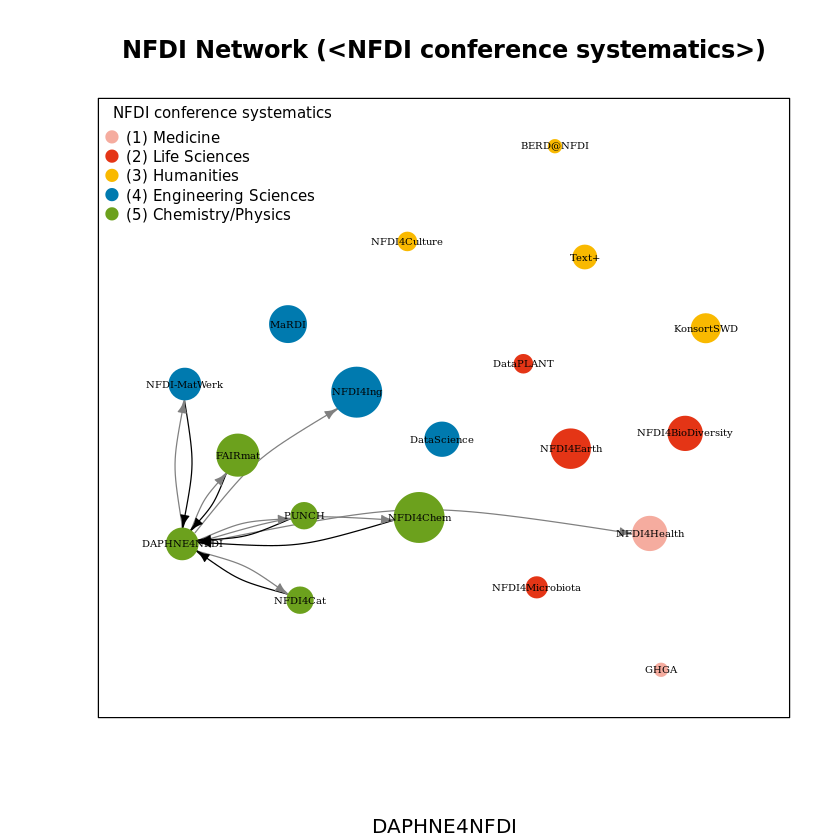

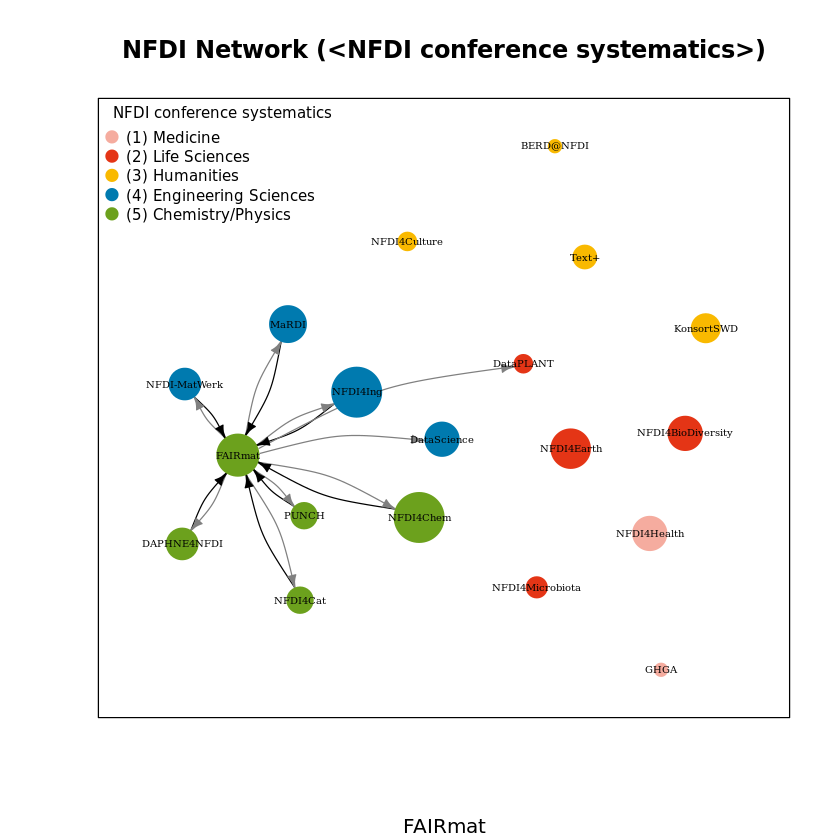

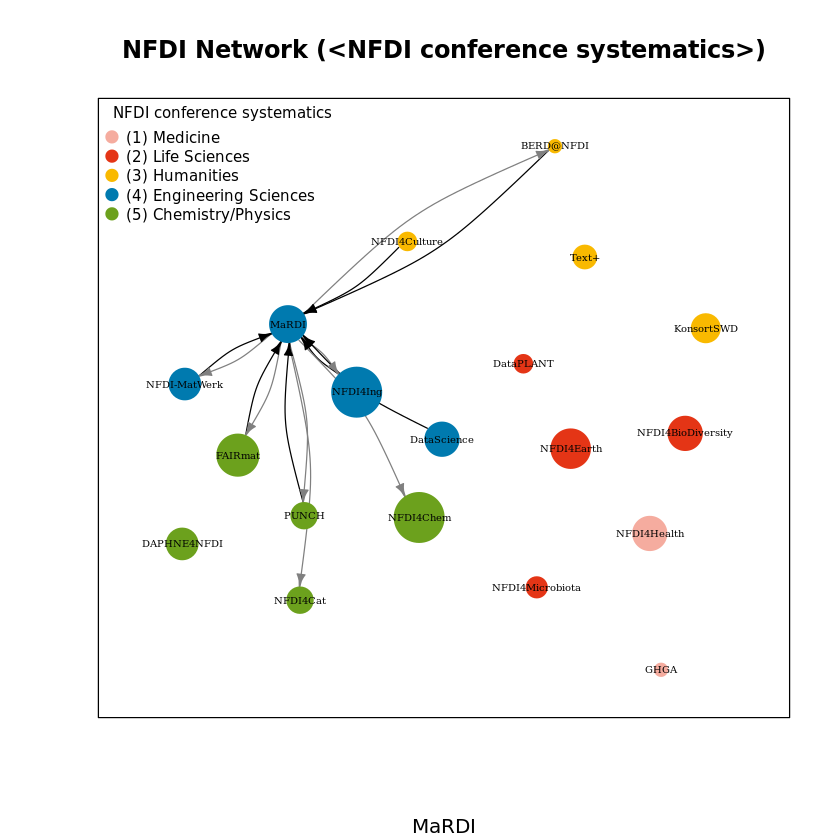

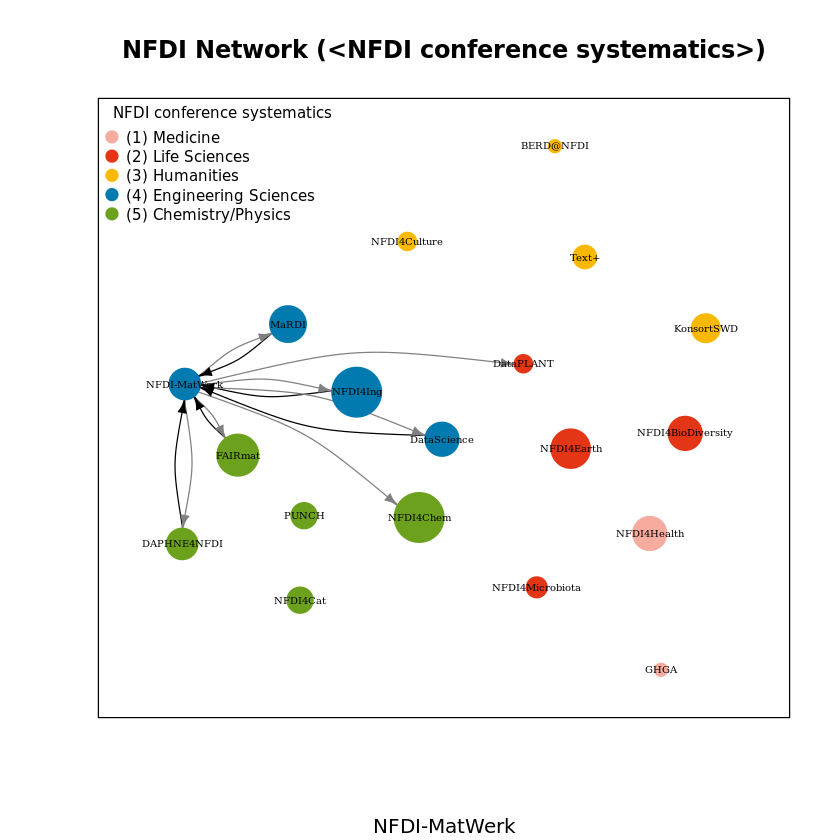

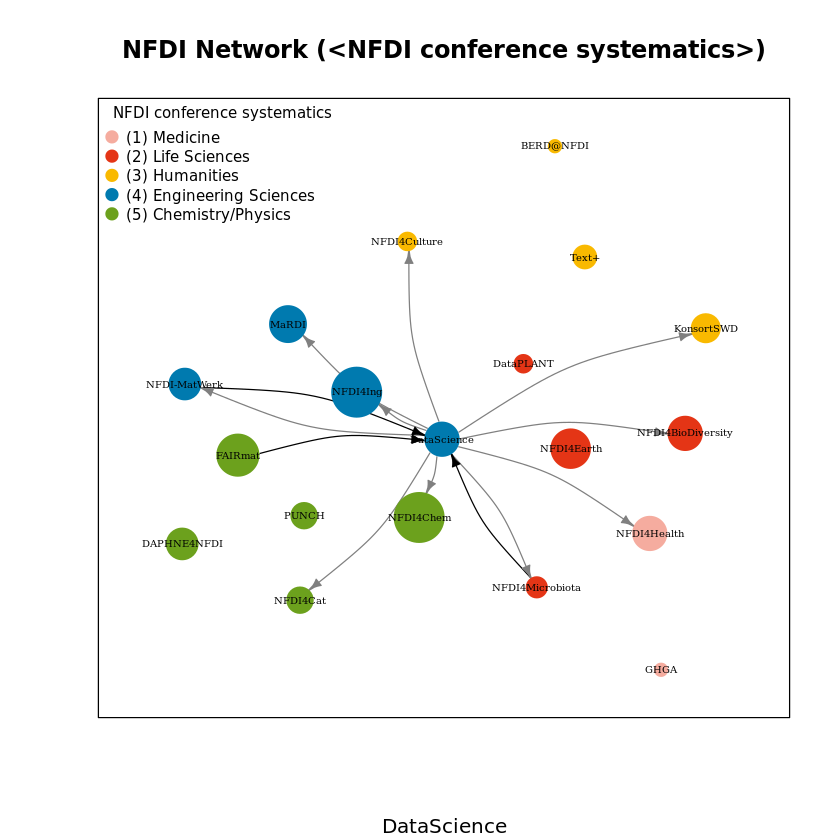

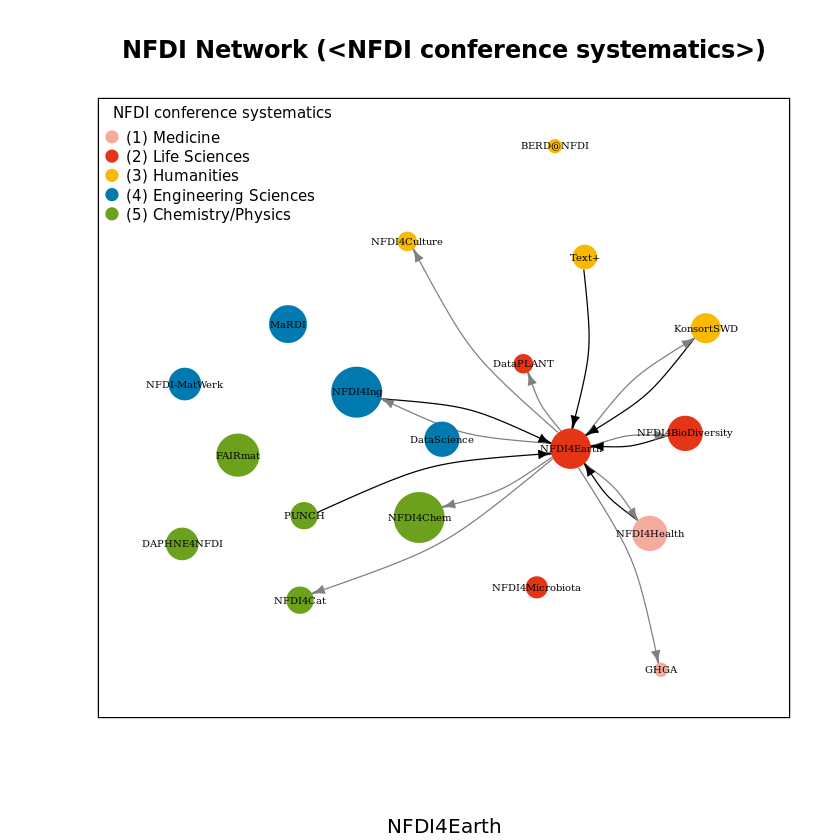

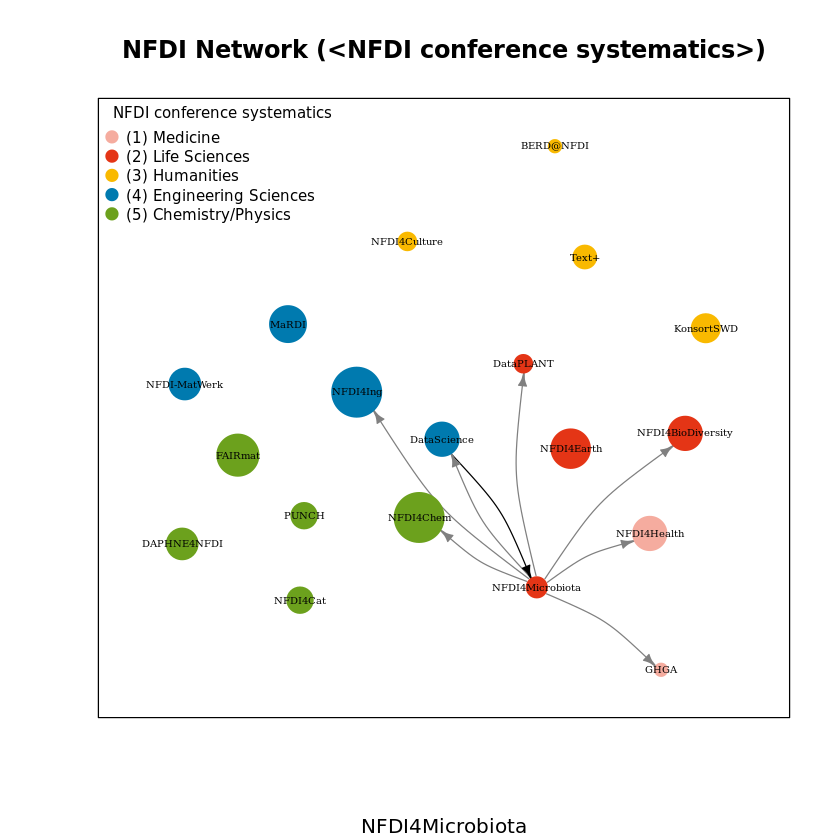

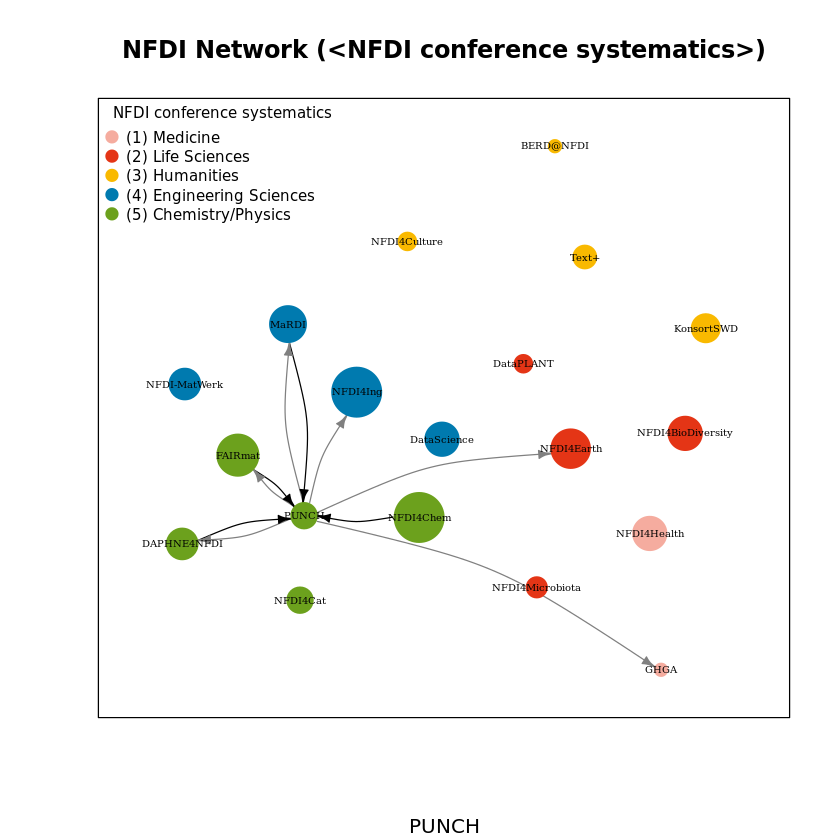

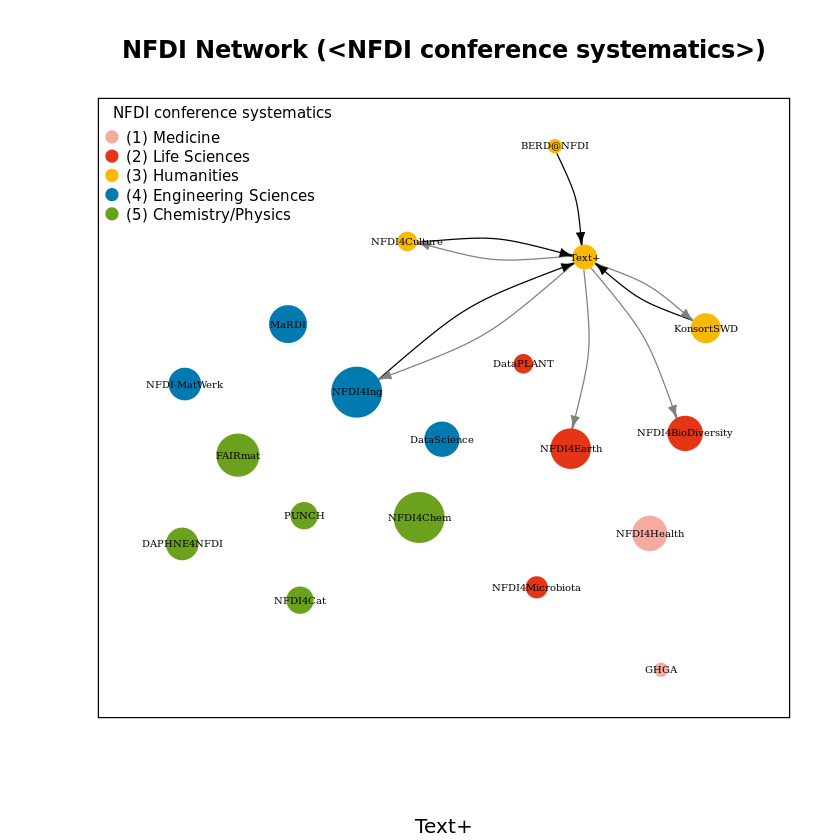

In [32]:
for (name in NFDI_nodes$name){
  nfdi_plot_group(name)
}

# Backup, export and outlook

We have done the network visualization and analysis using only the package 'igraph'.
Now you have to save the result, e.g. under "*File*" --> "*Save and Checkpoint*".
You can also download the JupyterNotebook, there are several formats available.

If you have created the network with the RNoteBook, you can call it up again at any time via the URL and you can make further modifications in the network.

There are other exciting occupations with this network.
For example, you can also create an interactive network or display the network as a pie chart.
Have a look at the overview on https://www.r-graph-gallery.com/network.html.